<a href="https://colab.research.google.com/github/Jdean4747/Data5600HW/blob/main/LoganHousingHW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [41]:
df = pd.read_csv('/content/Logan_housing.csv')
df.head()

,Sold Price,DOM,Garage Capacity,HOA Fee,Irregular Shape,Quadrant,School District,Sold Terms,Total Bedrooms,Total Bathrooms,Total Square Feet,Year Built,Zip,year_sold,month_sold,built_after_2000
0,176000,5,2,0,No,NW,Cache,FHA,3,1,1031,1974,84335,2018,9,0
1,225000,6,2,0,No,NW,Cache,Conventional,4,2,2091,1995,84335,2018,7,0
2,274900,14,2,0,No,NW,Cache,Conventional,3,1,2016,1980,84335,2018,11,0
3,175000,16,1,0,No,NW,Cache,USDA Rural Development,4,1,1920,1978,84335,2018,6,0
4,179000,29,0,0,No,NW,Cache,Cash,4,2,1329,1976,84335,2018,9,0


In [42]:
df = df.drop(['Garage Capacity', 'Irregular Shape', 'Sold Terms', 'Zip', 'month_sold', 'Year Built', 'year_sold'],axis=1)

In [43]:
df.isnull().sum()

,0
Sold Price,0
DOM,0
HOA Fee,0
Quadrant,0
School District,0
Total Bedrooms,0
Total Bathrooms,0
Total Square Feet,0
built_after_2000,0


In [44]:
df.nunique()

,0
Sold Price,1217
DOM,248
HOA Fee,96
Quadrant,4
School District,2
Total Bedrooms,9
Total Bathrooms,7
Total Square Feet,2009
built_after_2000,2


In [45]:
numeric = ['Sold Price','DOM','HOA Fee','Total Square Feet']
df[numeric] = df[numeric].astype('float32')
categorical = ['Quadrant','School District','Total Bedrooms','Total Bathrooms','built_after_2000']
df[categorical] = df[categorical].astype('category')

In [46]:
df['DOM'].describe()

,DOM
count,4110.000000
mean,40.550610
std,51.572006
min,1.000000
25%,6.000000
50%,23.000000
75%,56.000000
max,712.000000


Range = 711.000

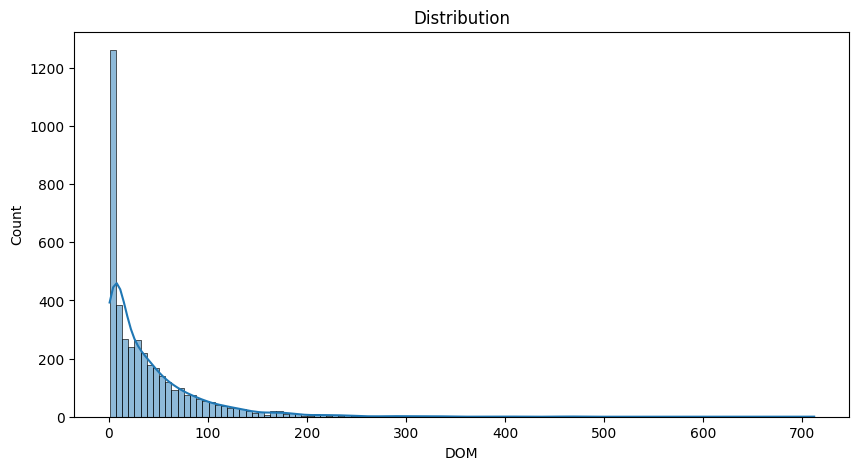

In [47]:
plt.figure(figsize=(10,5))
sns.histplot(df['DOM'], kde = True)
plt.xlabel('DOM')
plt.title('Distribution')
plt.show()

This histogram is not normal and is right skewed

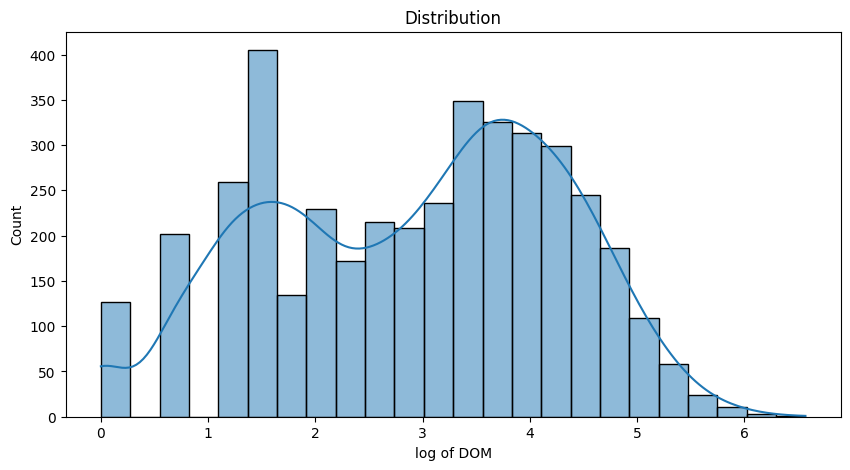

In [48]:
df['log_DOM'] = np.log(df['DOM'])
plt.figure(figsize=(10,5))
sns.histplot(df['log_DOM'], kde = True)
plt.xlabel('log of DOM')
plt.title('Distribution')
plt.show()

In [49]:
df.columns = df.columns.str.replace(' ','_')
df.columns

Index(['Sold_Price', 'DOM', 'HOA_Fee', 'Quadrant', 'School_District',
       'Total_Bedrooms', 'Total_Bathrooms', 'Total_Square_Feet',
       'built_after_2000', 'log_DOM'],
      dtype='object')

In [50]:
reg1 = smf.ols( formula = 'DOM ~ Sold_Price + HOA_Fee + Quadrant + School_District + Total_Bedrooms + Total_Bathrooms + Total_Square_Feet + built_after_2000', data = df).fit()
reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    DOM   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                     24.49
Date:                Wed, 29 Jan 2025   Prob (F-statistic):           2.16e-93
Time:                        06:00:36   Log-Likelihood:                -21783.
No. Observations:                4110   AIC:                         4.361e+04
Df Residuals:                    4087   BIC:                         4.376e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   48.7411     12.376      3.938      0.000      24.478      73.005
Quadrant[T.NW]              -1.5205      2.336     -0.651      0.515      -6.100       3.059
Quadrant[T.SE]              -3.8216      2.148     -1.779      0.075      -8.034       0.390
Quadrant[T.SW]              -3.4070      2.159     -1.578      0.115      -7.640       0.826
School_District[T.Logan]    -6.6816      1.831     -3.650      0.000     -10.271      -3.092
Total_Bedrooms[T.2]        -42.2135     12.532     -3.369      0.001     -66.782     -17.645
Total_Bedrooms[T.3]        -40.1930     12.498     -3.216      0.001     -64.696     -15.690
Total_Bedrooms[T.4]        -49.5392     12.614     -3.927      0.000     -74.269     -24.810
Total_Bedrooms[T.5]        -52.6678     12.746     -4.132      0.000     -77.657     -27.678
Total_Bedrooms[T.6]        -55.4158     12.986     -4.267      0.000     -80.875     -29.957
Total_Bedrooms[T.7]        -47.0100     14.645     -3.210      0.001     -75.722     -18.298
Total_Bedrooms[T.8]         13.3452     26.022      0.513      0.608     -37.672      64.362
Total_Bedrooms[T.9]        -36.4554     39.966     -0.912      0.362    -114.811      41.900
Total_Bathrooms[T.2]         1.3798      3.080      0.448      0.654      -4.659       7.419
Total_Bathrooms[T.3]         2.4281      3.407      0.713      0.476      -4.252       9.108
Total_Bathrooms[T.4]         6.7183      4.683      1.435      0.151      -2.462      15.899
Total_Bathrooms[T.5]        -6.9951      8.268     -0.846      0.398     -23.205       9.215
Total_Bathrooms[T.6]       -33.1468     16.005     -2.071      0.038     -64.526      -1.768
Total_Bathrooms[T.7]        97.8675     26.322      3.718      0.000      46.263     149.472
built_after_2000[T.1]        3.6045      1.937      1.860      0.063      -0.194       7.403
Sold_Price               -1.263e-05   1.25e-05     -1.011      0.312   -3.71e-05    1.19e-05
HOA_Fee                      0.0584      0.013      4.616      0.000       0.034       0.083
Total_Square_Feet            0.0169      0.002     10.561      0.000       0.014       0.020
==============================================================================
Omnibus:                     2575.662   Durbin-Watson:                   0.400
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            44328.250
Skew:                           2.697   Prob(JB):                         0.00
Kurtosis:                      18.158   Cond. No.                     1.80e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+07. This might indicate that there are
strong multi

Quadrant T.SE is selling the fastest with a coefficient of -3.8216. If the HOA fee was increased by 100 dollars then the DOM would increase by 5.84 days. This does make sense because the higher the HOA fee is the less buyers are going to want to make a purchase.

In [51]:
reg2 = smf.ols( formula = 'log_DOM ~ Sold_Price + HOA_Fee + Quadrant + School_District + Total_Bedrooms + Total_Bathrooms + Total_Square_Feet + built_after_2000', data = df).fit()
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                log_DOM   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     21.17
Date:                Wed, 29 Jan 2025   Prob (F-statistic):           7.59e-80
Time:                        06:00:36   Log-Likelihood:                -6928.1
No. Observations:                4110   AIC:                         1.390e+04
Df Residuals:                    4087   BIC:                         1.405e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                    3.0403      0.333      9.119      0.000       2.387       3.694
Quadrant[T.NW]              -0.0069      0.063     -0.110      0.913      -0.130       0.116
Quadrant[T.SE]              -0.0202      0.058     -0.349      0.727      -0.134       0.093
Quadrant[T.SW]              -0.0584      0.058     -1.003      0.316      -0.172       0.056
School_District[T.Logan]    -0.1870      0.049     -3.793      0.000      -0.284      -0.090
Total_Bedrooms[T.2]         -1.0584      0.338     -3.135      0.002      -1.720      -0.397
Total_Bedrooms[T.3]         -0.8799      0.337     -2.613      0.009      -1.540      -0.220
Total_Bedrooms[T.4]         -1.0882      0.340     -3.203      0.001      -1.754      -0.422
Total_Bedrooms[T.5]         -1.0896      0.343     -3.173      0.002      -1.763      -0.416
Total_Bedrooms[T.6]         -1.0407      0.350     -2.975      0.003      -1.726      -0.355
Total_Bedrooms[T.7]         -0.8680      0.395     -2.200      0.028      -1.641      -0.095
Total_Bedrooms[T.8]         -1.1002      0.701     -1.569      0.117      -2.474       0.274
Total_Bedrooms[T.9]         -0.4843      1.077     -0.450      0.653      -2.595       1.626
Total_Bathrooms[T.2]         0.0708      0.083      0.853      0.394      -0.092       0.233
Total_Bathrooms[T.3]         0.1785      0.092      1.944      0.052      -0.001       0.358
Total_Bathrooms[T.4]         0.2263      0.126      1.794      0.073      -0.021       0.474
Total_Bathrooms[T.5]        -0.1018      0.223     -0.457      0.648      -0.538       0.335
Total_Bathrooms[T.6]        -0.7346      0.431     -1.704      0.089      -1.580       0.111
Total_Bathrooms[T.7]         0.0044      0.709      0.006      0.995      -1.386       1.395
built_after_2000[T.1]        0.1571      0.052      3.011      0.003       0.055       0.259
Sold_Price               -1.677e-06   3.36e-07     -4.985      0.000   -2.34e-06   -1.02e-06
HOA_Fee                      0.0013      0.000      3.841      0.000       0.001       0.002
Total_Square_Feet            0.0005    4.3e-05     11.663      0.000       0.000       0.001
==============================================================================
Omnibus:                      293.712   Durbin-Watson:                   0.218
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              129.700
Skew:                          -0.230   Prob(JB):                     6.86e-29
Kurtosis:                       2.262   Cond. No.                     1.80e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+07. This might indicate that there are
strong multi

In [57]:
actual = df['DOM']
predictions = reg1.fittedvalues

MAE = mean_absolute_error(actual, predictions)
MSE = mean_squared_error(actual, predictions)
RMSE = np.sqrt(MSE)
RMSPE = np.sqrt(np.mean(np.square(((actual - predictions) / actual))))

print('MAE:', MAE)
print('MSE:', MSE)
print('RMSE:', RMSE)
print('RMSPE:', RMSPE)

MAE: 33.295849149429124
MSE: 2349.319085786071
RMSE: 48.46977497148167
RMSPE: 8.223327996878488


MAE: 33.295849149429124

MSE: 2349.319085786071

RMSE: 48.46977497148167

RMSPE: 8.223327996878488